In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets
from sklearn.metrics import davies_bouldin_score

In [2]:
data = pd.read_csv("../data/xigua4.0.csv")
data

,编号,密度,含糖率,好瓜
0,1,0.697,0.460,1
1,2,0.774,0.376,1
2,3,0.634,0.264,1
3,4,0.608,0.318,1
4,5,0.556,0.215,1
5,6,0.403,0.237,1
6,7,0.481,0.149,1
7,8,0.437,0.211,1
8,9,0.666,0.091,-1
9,10,0.243,0.267,-1


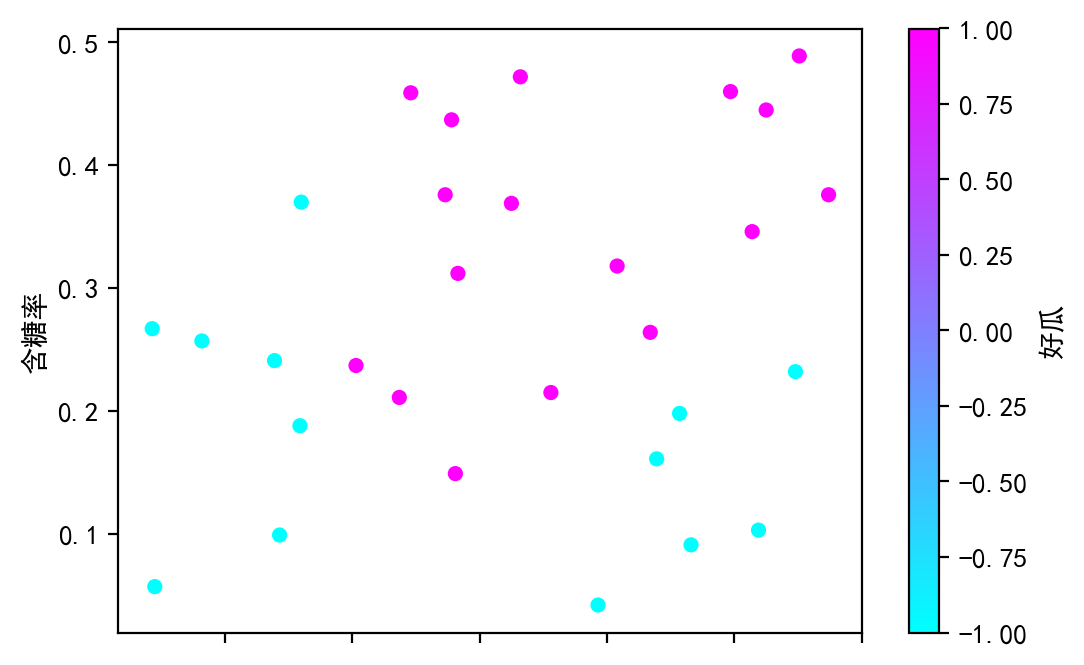

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['font.sans-serif'] = ['simhei']
plt.rcParams['axes.unicode_minus'] = False
data.plot(kind='scatter', x='密度', y='含糖率', c='好瓜', cmap='cool')
plt.show()

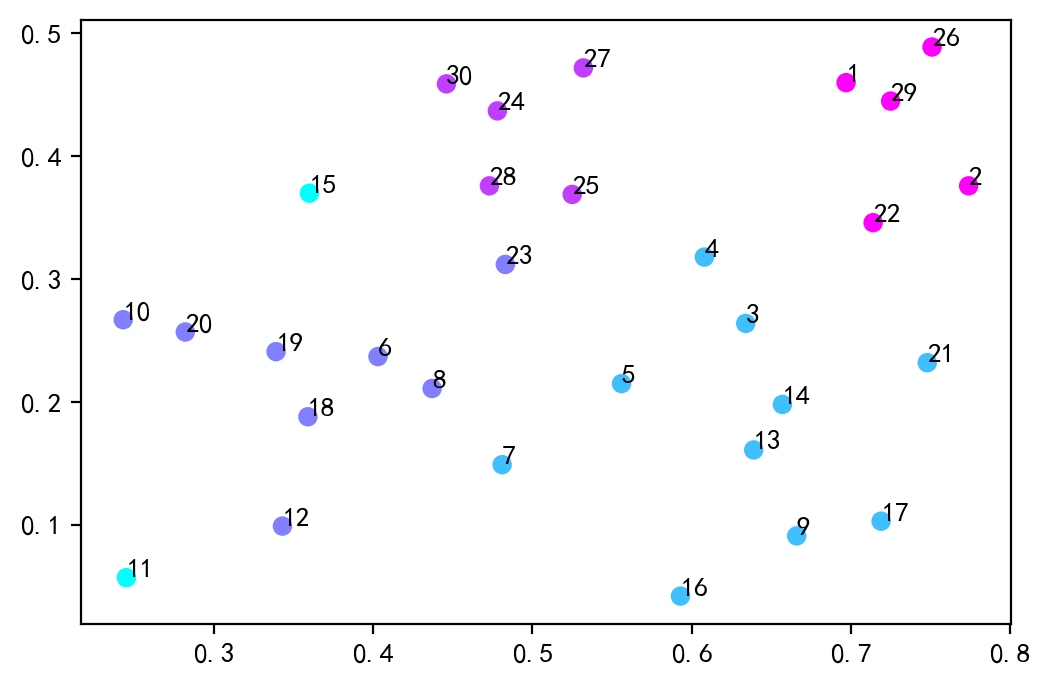

In [20]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.11, min_samples=5)
data_predict = model.fit_predict(data[['密度', '含糖率']])
plt.scatter(data[['密度']], data[['含糖率']], c=data_predict, cmap='cool')
for idx, row in data.iterrows():
    plt.annotate(int(row['编号']), xy=(row['密度'], row['含糖率']))
plt.show()

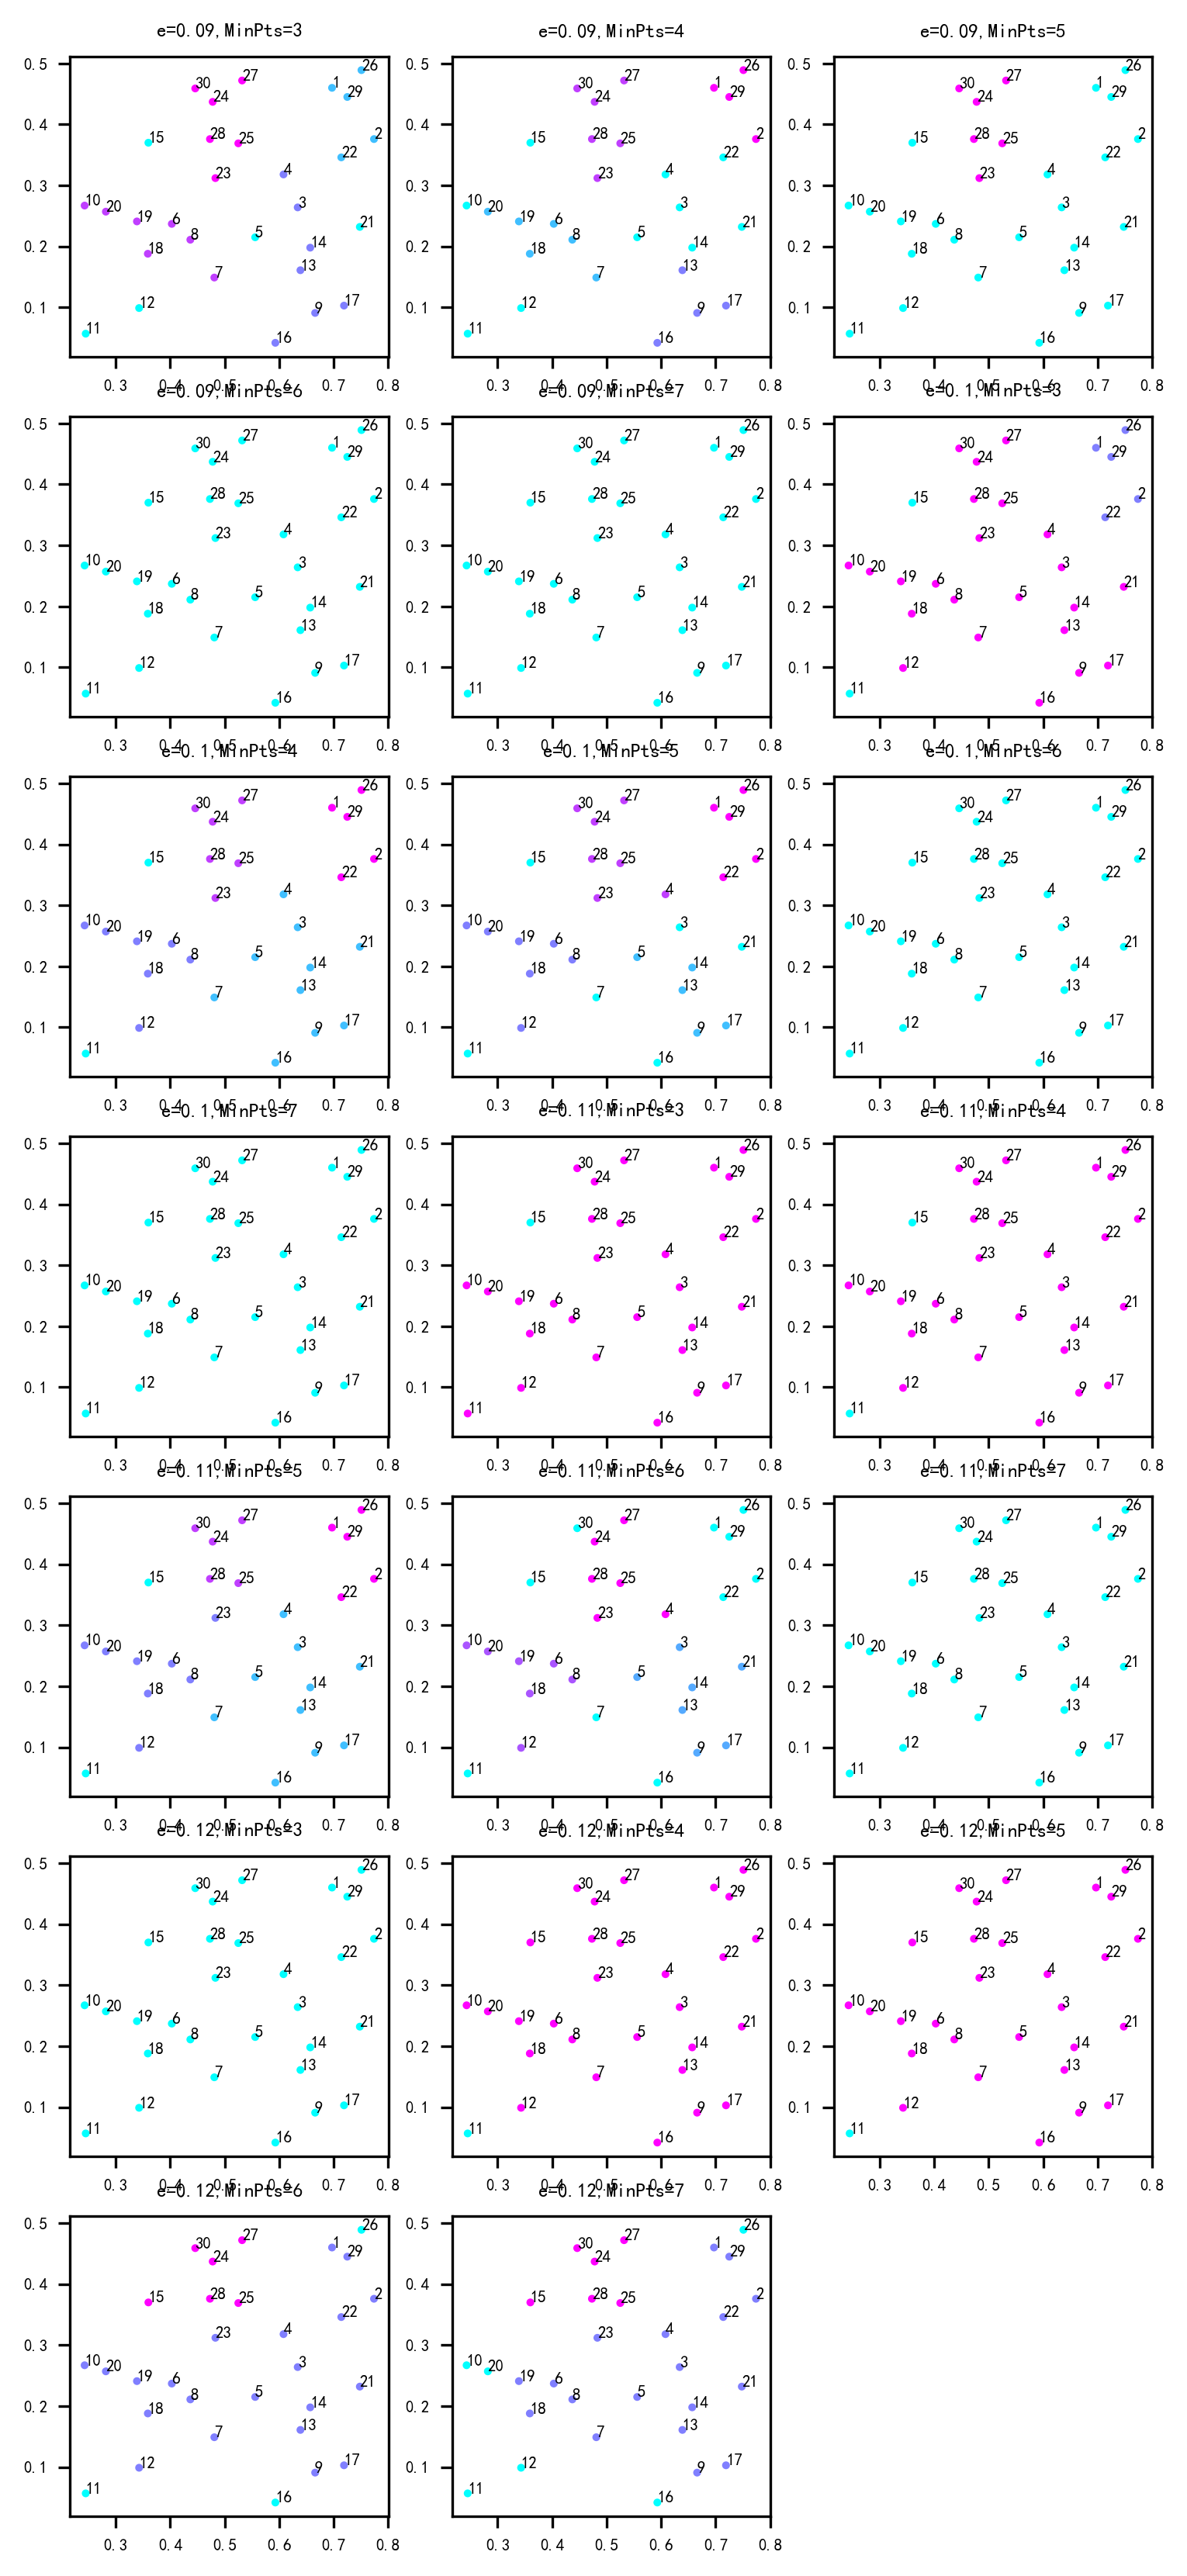

In [24]:
from sklearn.cluster import DBSCAN
plt.rcParams['font.size'] = 5
plt.figure(figsize=(6, 14), dpi=300)
i = 0
for e in [0.09, 0.1, 0.11, 0.12]:
    for MinPts in [3, 4, 5, 6, 7]:
        i += 1
        model = DBSCAN(eps=e, min_samples=MinPts)
        data_predict = model.fit_predict(data[['密度', '含糖率']])
        plt.subplot(7, 3, i)
        plt.scatter(data[['密度']], data[['含糖率']], c=data_predict, cmap='cool', s=2)
        for idx, row in data.iterrows():
            plt.annotate(int(row['编号']), xy=(row['密度'], row['含糖率']))
        plt.title("e={},MinPts={}".format(e, MinPts))
plt.show()

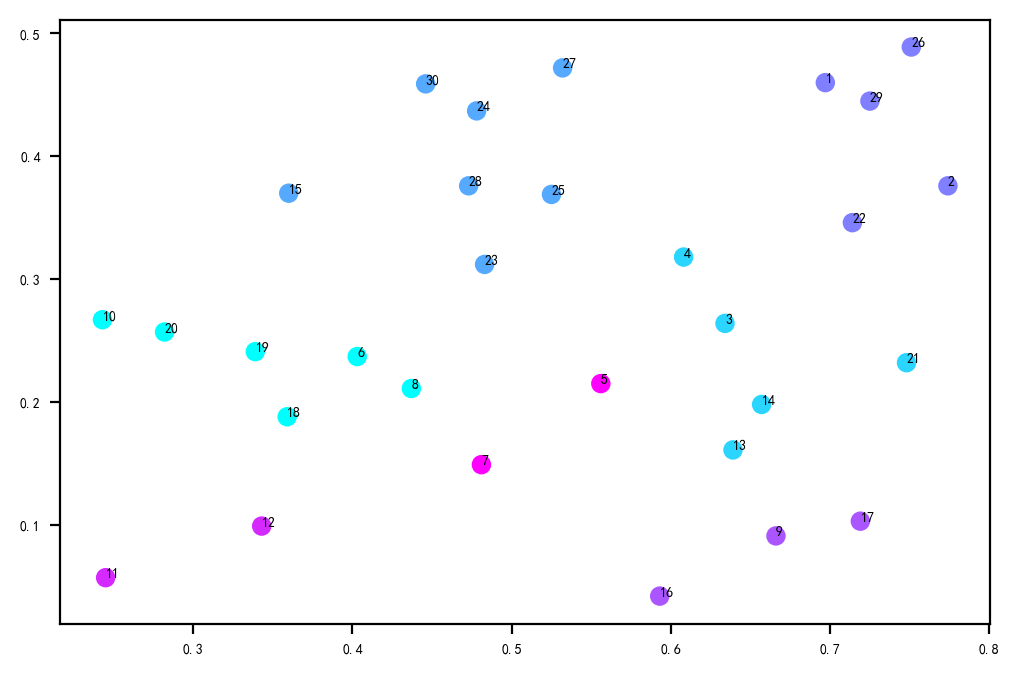

In [25]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=7)
data_predict = model.fit_predict(data[['密度', '含糖率']])
plt.scatter(data[['密度']], data[['含糖率']], c=data_predict, cmap='cool')
for idx, row in data.iterrows():
    plt.annotate(int(row['编号']), xy=(row['密度'], row['含糖率']))
plt.show()

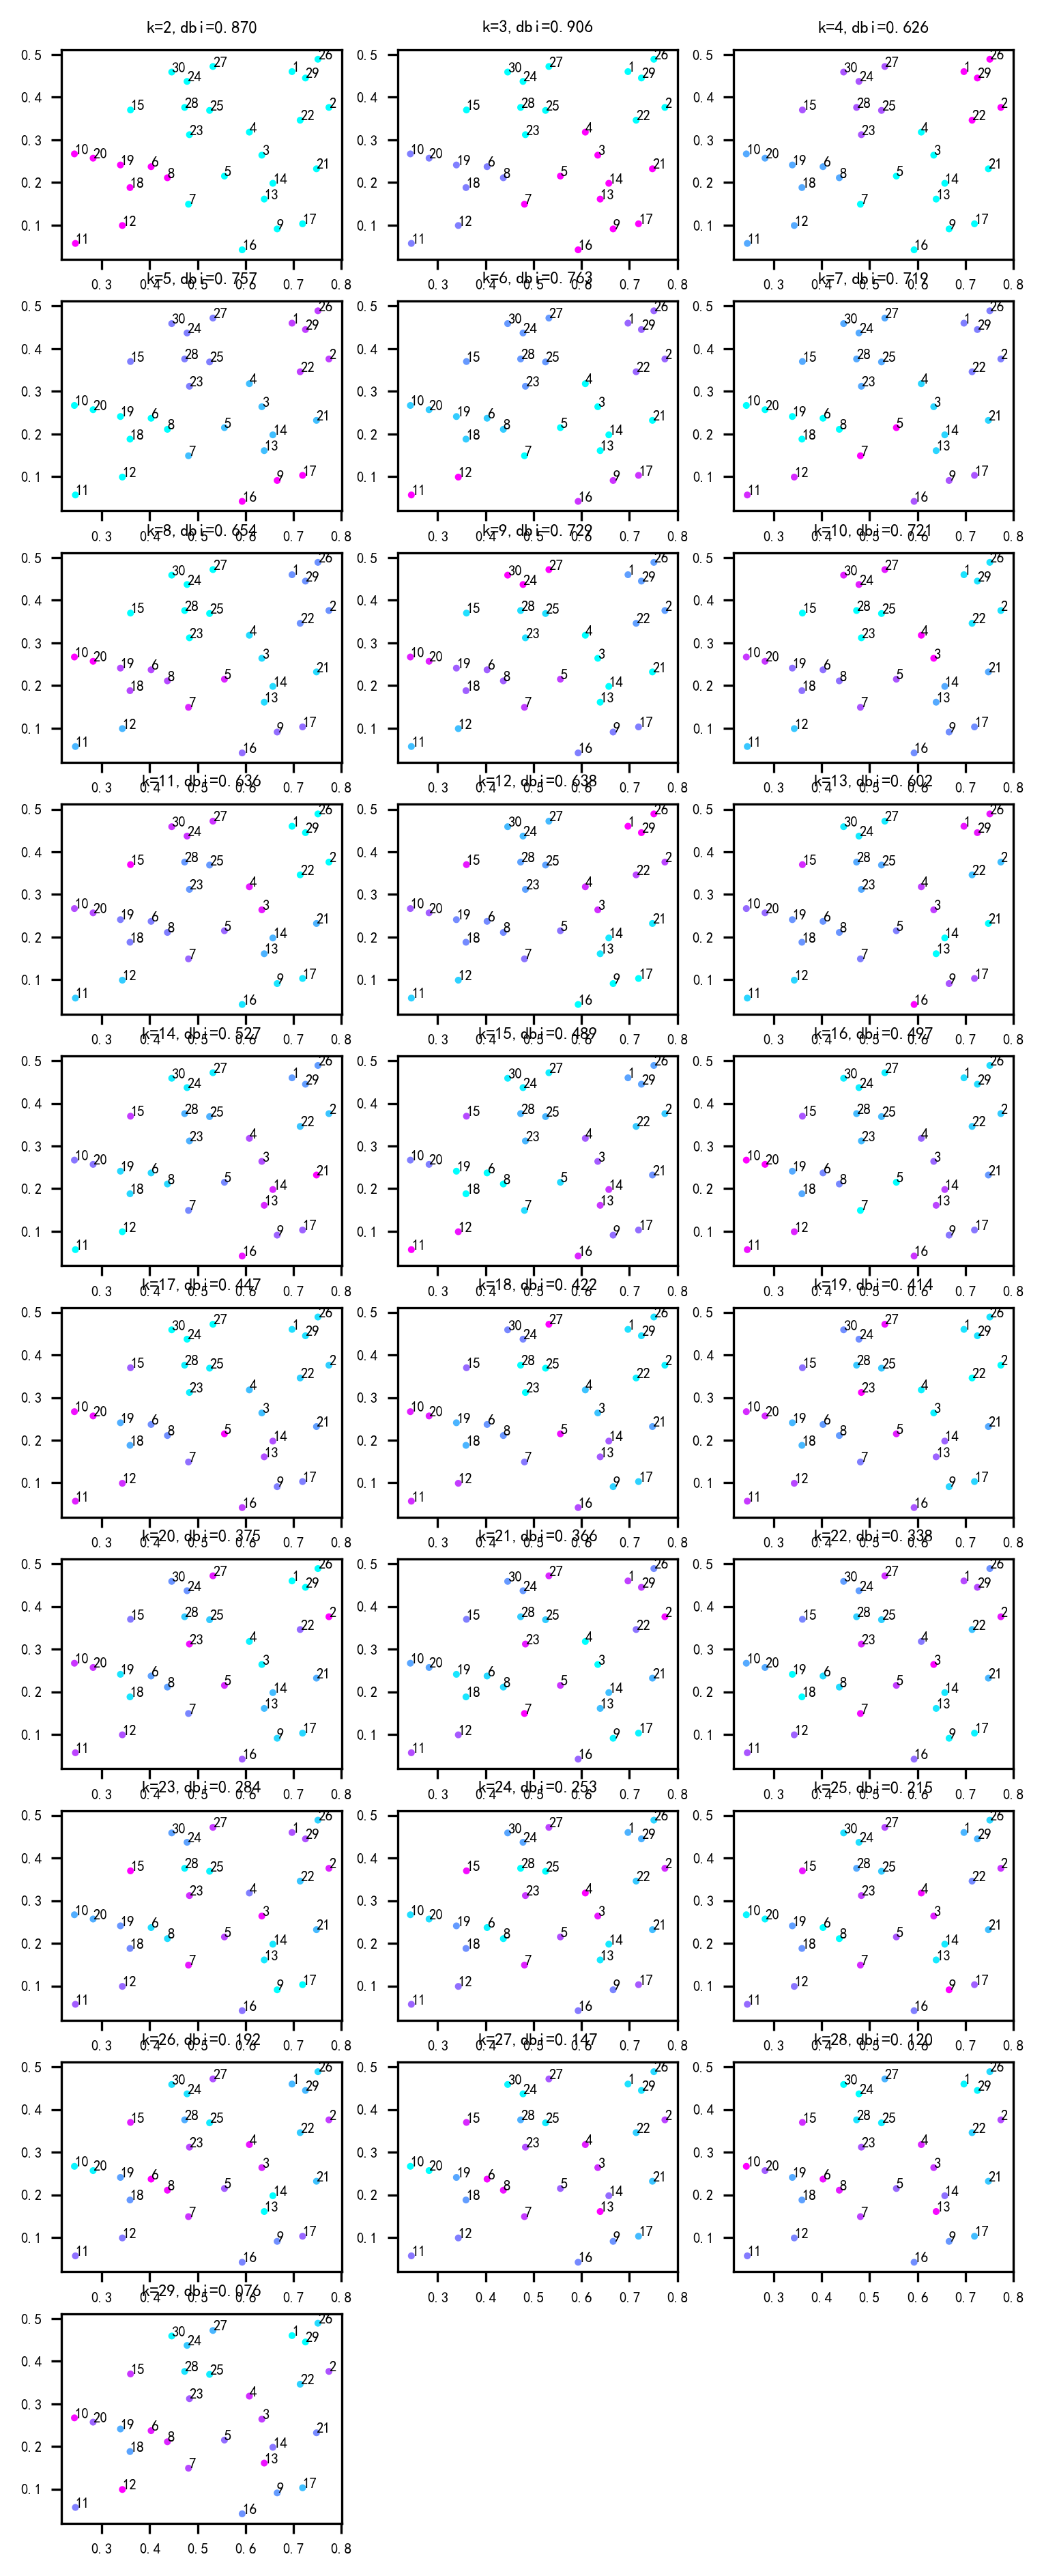

In [38]:
plt.rcParams['font.size'] = 5
plt.figure(figsize=(6, 16), dpi=400)
i = 0
for k in range(2, len(data)):
    i += 1
    model = AgglomerativeClustering(n_clusters=k)
    data_predict = model.fit_predict(data[['密度', '含糖率']])
    score = davies_bouldin_score(data[['密度', '含糖率']], data_predict)
    plt.subplot(10, 3, i)
    plt.scatter(data[['密度']], data[['含糖率']], c=data_predict, cmap='cool', s=2)
    for idx, row in data.iterrows():
        plt.annotate(int(row['编号']), xy=(row['密度'], row['含糖率']))
    plt.title("k={},dbi={}".format(k, str(score)[:5]))
plt.show()

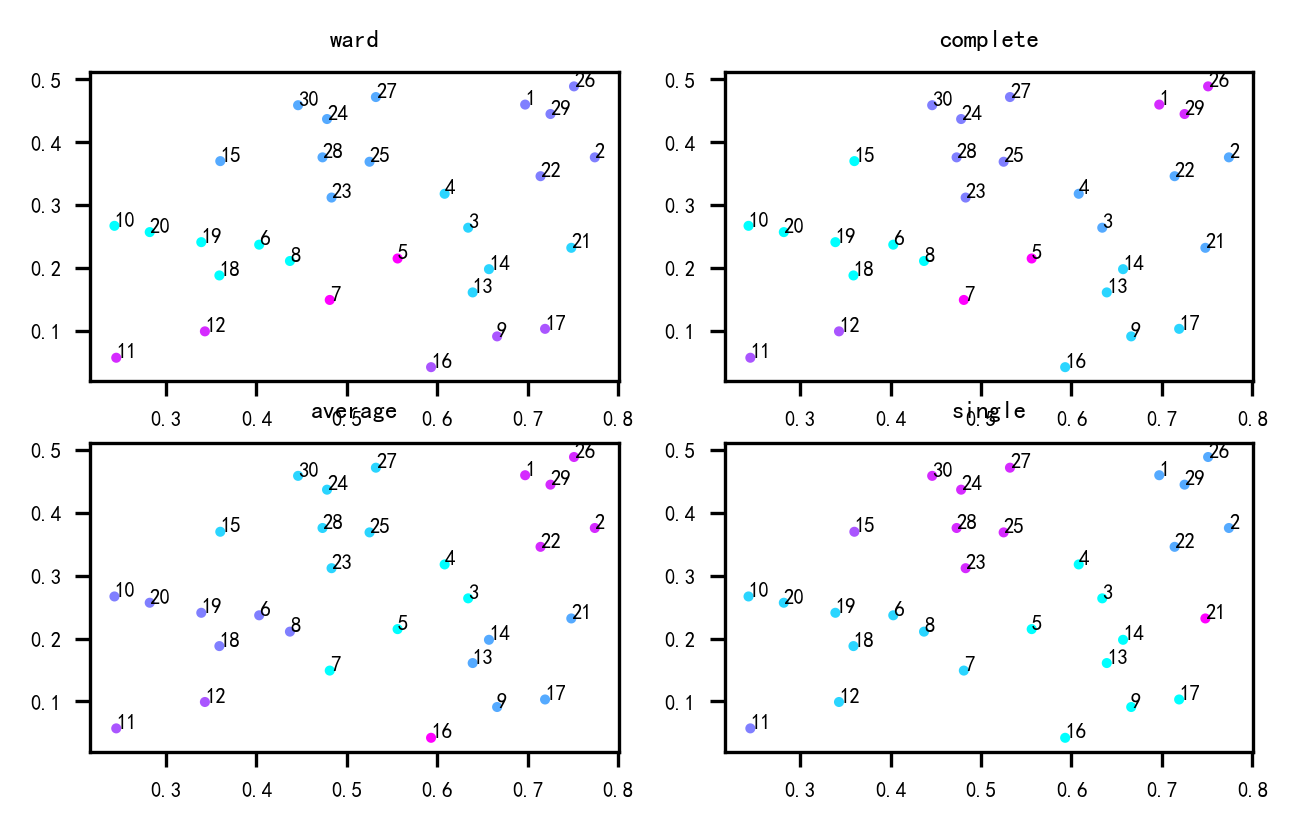

In [30]:
plt.rcParams['font.size'] = 5
plt.figure(figsize=(5, 3), dpi=300)
i = 0
for link in ['ward', 'complete', 'average', 'single']:
    i += 1
    model = AgglomerativeClustering(n_clusters=7, linkage=link)
    data_predict = model.fit_predict(data[['密度', '含糖率']])
    plt.subplot(2, 2, i)
    plt.scatter(data[['密度']], data[['含糖率']], c=data_predict, cmap='cool', s=2)
    for idx, row in data.iterrows():
        plt.annotate(int(row['编号']), xy=(row['密度'], row['含糖率']))
    plt.title(link)
plt.show()

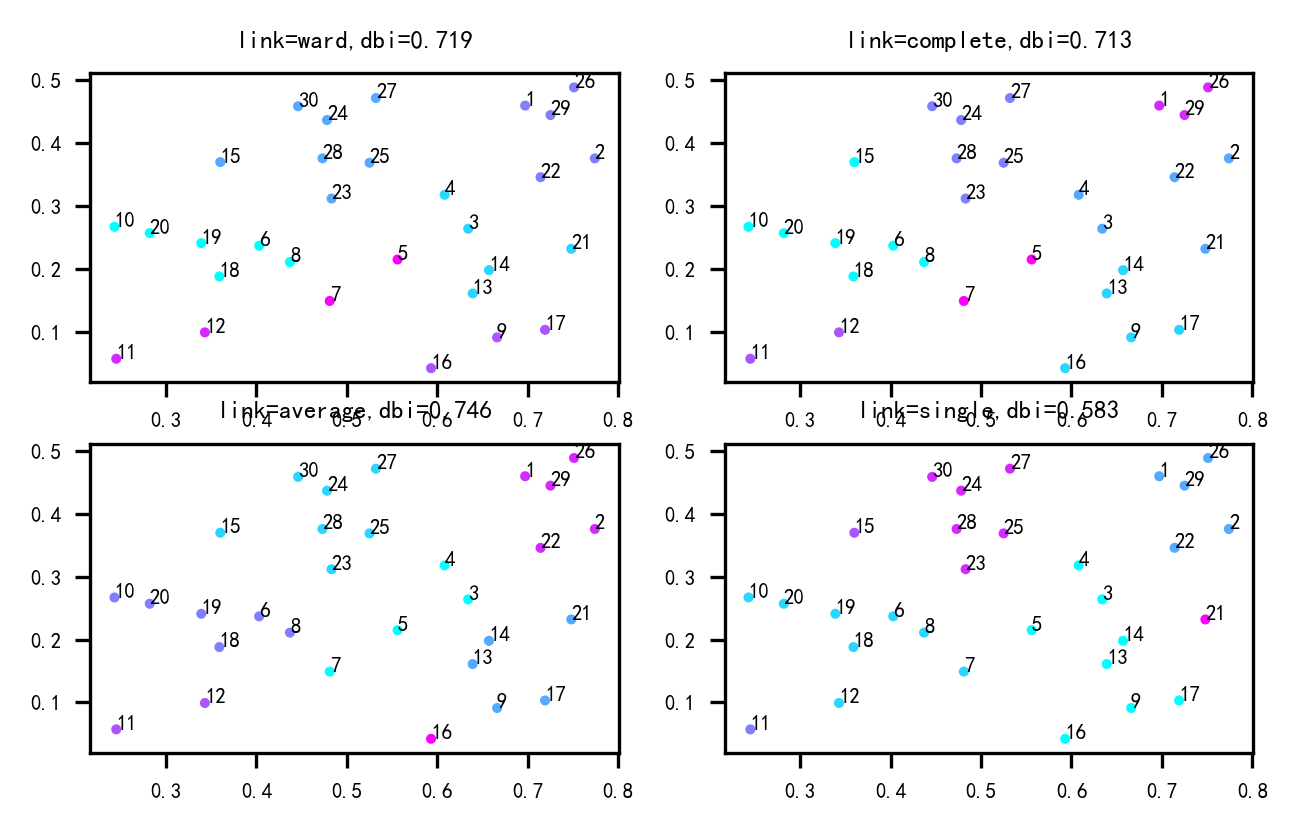

In [34]:
plt.rcParams['font.size'] = 5
plt.figure(figsize=(5, 3), dpi=300)
i = 0
for link in ['ward', 'complete', 'average', 'single']:
    i += 1
    model = AgglomerativeClustering(n_clusters=7, linkage=link)
    data_predict = model.fit_predict(data[['密度', '含糖率']])
    score = davies_bouldin_score(data[['密度', '含糖率']], data_predict)
    plt.subplot(2, 2, i)
    plt.scatter(data[['密度']], data[['含糖率']], c=data_predict, cmap='cool', s=2)
    for idx, row in data.iterrows():
        plt.annotate(int(row['编号']), xy=(row['密度'], row['含糖率']))
    plt.title("link={},dbi={}".format(link, str(score)[:5]))
plt.show()